In [61]:
# Data handling
import pandas as pd
import numpy as np

# Text cleaning
import re
import string

# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Evaluation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
# Load dataset
from google.colab import files
uploaded = files.upload()  # Choose Excel file from computer

import pandas as pd
df = pd.read_excel(next(iter(uploaded)))  # Load the uploaded file
df.head()
data = pd.read_excel("Tweets.xlsx")

# Peek at structure
print(data.head())
print(data.columns)

Saving Tweets.xlsx to Tweets (3).xlsx
  airline_sentiment  sentiment_confidence  \
0           neutral                1.0000   
1          positive                0.3486   
2           neutral                0.6837   
3          negative                1.0000   
4          negative                1.0000   

                                                text  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...  
Index(['airline_sentiment', 'sentiment_confidence', 'text'], dtype='object')


In [63]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)         # remove URLs
    text = re.sub(r'@\w+', '', text)       # remove mentions
    text = re.sub(r'#', '', text)     # remove hashtags symbol
    #text = re.sub(f"[{string.punctuation}]", '', text) #remove punctuation
    text = re.sub(r'\d+', '', text)   # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    return text
df['clean_text'] = df['text'].apply(clean_text)
data['clean_text'] = data['text'].apply(clean_text)
df.head()

,airline_sentiment,sentiment_confidence,text,clean_text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.,what said.
1,positive,0.3486,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experienc...
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...,i didn't today... must mean i need to take ano...
3,negative,1.0000,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""ent..."
4,negative,1.0000,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it


In [64]:
#Remove stopwords
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

df['clean_text'] = df['clean_text'].apply(remove_stopwords)
df.head()

#output_path = "cleaned_tweets.xlsx"
#df.to_excel(output_path, index=False)

# Download to your local machine (Colab only)
#from google.colab import files
#files.download(output_path)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,airline_sentiment,sentiment_confidence,text,clean_text
0,neutral,1.0000,@VirginAmerica What @dhepburn said.,said.
1,positive,0.3486,@VirginAmerica plus you've added commercials t...,plus added commercials experience... tacky.
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...,today... must mean need take another trip!
3,negative,1.0000,@VirginAmerica it's really aggressive to blast...,"really aggressive blast obnoxious ""entertainme..."
4,negative,1.0000,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [65]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['clean_text'])

In [66]:
# Dimensionality reduction - PCA
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X.toarray())

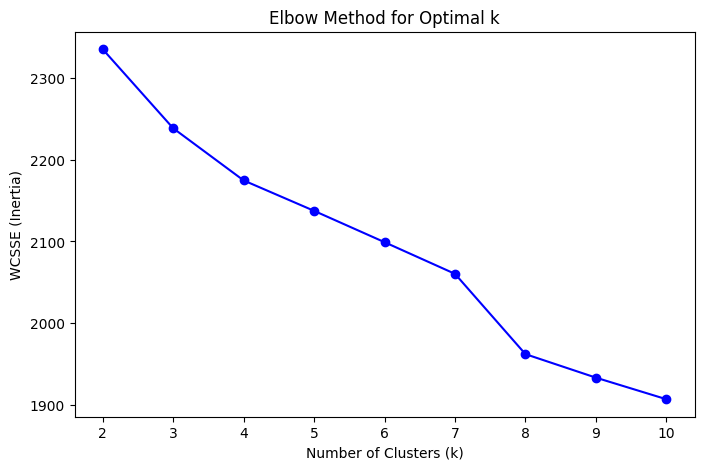

In [67]:
# K means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcsse = []  # within-cluster sum of squared errors

# Try cluster counts from 2 to 10
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # or X if skipping PCA
    wcsse.append(kmeans.inertia_)  # inertia_ = WCSSE

# Plot WCSSE vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(K, wcsse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [68]:
# Choose cluster size
optimal_k = 3  # from diagram elbow should be k=8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_pca)

In [69]:
#!pip install kneed
#from kneed import KneeLocator

#kl = KneeLocator(K, wcsse, curve='convex', direction='decreasing')
#print(f"Optimal number of clusters: {kl.elbow}")

In [70]:
#optimal_k = kl.elbow

In [71]:
#kmeans = KMeans(n_clusters=3, random_state=42)
#clusters = kmeans.fit_predict(X_pca)
#data['cluster'] = clusters

In [72]:
#agg = AgglomerativeClustering(n_clusters=3)
#data['agg_cluster'] = agg.fit_predict(X_pca)

#dbscan = DBSCAN(eps=1.2, min_samples=10)
#data['dbscan_cluster'] = dbscan.fit_predict(X_pca)

In [73]:
print("Silhouette Score (KMeans):", silhouette_score(X_pca, clusters))
pd.crosstab(data['airline_sentiment'], data['cluster'])

Silhouette Score (KMeans): 0.09634638618731937


cluster,0,1,2
airline_sentiment,,,
negative,6477,2523,178
neutral,2449,526,124
positive,1614,245,503


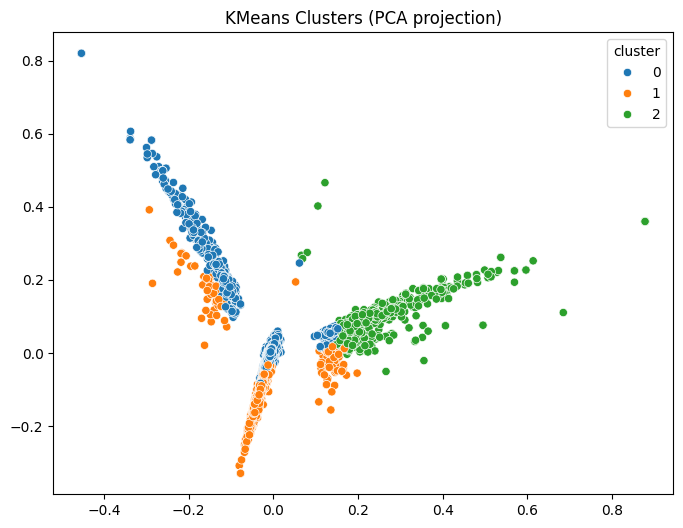

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['cluster'], palette='tab10')
plt.title("KMeans Clusters (PCA projection)")
plt.show()

In [75]:
# Check samples that were placed in the "wrong" cluster
data['mismatch'] = data['airline_sentiment'] != data['cluster'].map(
    lambda x: data.groupby('cluster')['airline_sentiment'].agg(lambda y: y.value_counts().index[0])[x]
)

low_conf = data[data['mismatch'] & (data['sentiment_confidence'] < 0.6)]
print(low_conf[['text', 'airline_sentiment', 'sentiment_confidence', 'cluster']].head())


                                                  text airline_sentiment  \
1    @VirginAmerica plus you've added commercials t...          positive   
113  @VirginAmerica come back to #PHL already. We n...          positive   
141  @VirginAmerica Can you find us a flt out of LA...           neutral   
182  😎 RT @VirginAmerica: You’ve met your match. Go...          positive   
308  @VirginAmerica is saving my sanity right now: ...           neutral   

     sentiment_confidence  cluster  
1                  0.3486        0  
113                0.3482        0  
141                0.3550        0  
182                0.3579        0  
308                0.3750        0  


In [76]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(data['clean_text'], show_progress_bar=True)

Batches:   0%|          | 0/458 [00:00<?, ?it/s]